# Network analysis

### Build the three editor networks

In [2]:
import pandas as pd
import networkx as nx



all_editors=pd.read_csv("registered_editors_all_stats_v6_IDs.csv", encoding='utf-8')


editors_dict=all_editors.to_dict(orient='records')
# for row in editors_dict:
#     del row['name']

graph_lst=list(zip(all_editors['name'].to_list(), editors_dict))

# add nodes 
G = nx.Graph()
# G.add_nodes_from(editors['names'].tolist())
G.add_nodes_from(graph_lst)
print('number of nodes before edges all: ', G.number_of_nodes())

number of nodes before edges all:  31196


In [5]:
#add edges

all_edges=pd.read_csv('all_edges.csv',encoding='utf-8')

G.add_edges_from(list(zip(all_edges.Source, all_edges.Target)))
print('number of edges all: ',G.number_of_edges())
print('number of nodes after edges all: ', G.number_of_nodes())

number of edges all:  619677
number of nodes after edges all:  31196


In [6]:
#WITHOUT BOTS
# create generator
nodesB = (
    node
    for node, data
    in G.nodes(data=True)
    if data.get("username_type") != "bot"
)
G2 = G.subgraph(nodesB)
print('number of nodes without bots: ', G2.number_of_nodes())
print('number of edges without bots: ',G2.number_of_edges())

number of nodes without bots:  31125
number of edges without bots:  607474


In [7]:
#ONLY REGISTERED
# create generator
nodesR = (
    node
    for node, data
    in G.nodes(data=True)
    if data.get("username_type") == "registered"
)
G3 = G.subgraph(nodesR)
print('number of nodes only registered: ', G3.number_of_nodes())
print('number of edges only registered: ',G3.number_of_edges())

number of nodes only registered:  21995
number of edges only registered:  470277


In [ ]:
import graph_measurments as gm # this is our script included in the next box

path_save='path_to_save'

#----RUN the different networks
# print('start graph_all')
# gm.measurments(G,path_save, 'all')
# print('finish graph_all')
# print('start graph_without_bot')
# gm.measurments(G2,path_save, 'without_bots')
# print('finish graph_without_bot')
print('start graph_only_registered')
gm.measurments(G3,path_save, 'only_registered')
print('finish graph_only_registered')

In [ ]:
# Function to measure the centrality metrics

import networkx as nx
import networkx.algorithms.community as nx_comm
import pandas as pd

def measurments(G, path_save, name):
    # Degree centrality
    print('start degree')
    degree_centrality = nx.degree_centrality(G)
    dc=pd.DataFrame(degree_centrality.items(), columns=['editors', 'degree_centrality'])
    print('finish degree')
    #eigenvector centrality
    print('start eigenvector')
    eigenvector_centrality = nx.eigenvector_centrality(G)
    ec=pd.DataFrame(eigenvector_centrality.items(), columns=['editors', 'eigenvector_centrality'])
    print('finish eigenvector')
    #closeness centrality
    print('start closeness')
    closeness_centrality = nx.closeness_centrality(G)
    cc=pd.DataFrame(closeness_centrality.items(), columns=['editors', 'closeness_centrality'])
    print('finish closeness')
    #betweenness centrality 
    print('start betweenness')
    betweenness_centrality = nx.betweenness_centrality(G)
    bc=pd.DataFrame(betweenness_centrality.items(), columns=['editors', 'betweenness_centrality'])
    print('finish betweenness')
    #clustering coifficient
    print('start cluster')
    clustering_coifficient=nx.clustering(G, nodes=None, weight=None)
    cl_c=pd.DataFrame(clustering_coifficient.items(), columns=['editors', 'clustering_coifficient'])
    print('finish cluster')
    #merge dfs and save to csv
    df_centrality=pd.concat([dc,ec['eigenvector_centrality'],cc['closeness_centrality'],bc['betweenness_centrality'], cl_c['clustering_coifficient']], axis=1)
    df_centrality.to_csv(str(path_save)+str(name)+'centrality_metrics.csv', encoding='utf-8', index=None)
    print('centrality saved')





In [1]:
import pandas as pd

NF=pd.read_csv('allcentrality_metrics.csv', encoding='utf-8')
NH=pd.read_csv('without_botscentrality_metrics.csv',encoding='utf-8')
NR=pd.read_csv('only_registeredcentrality_metrics.csv', encoding='utf-8')

### RQ 1

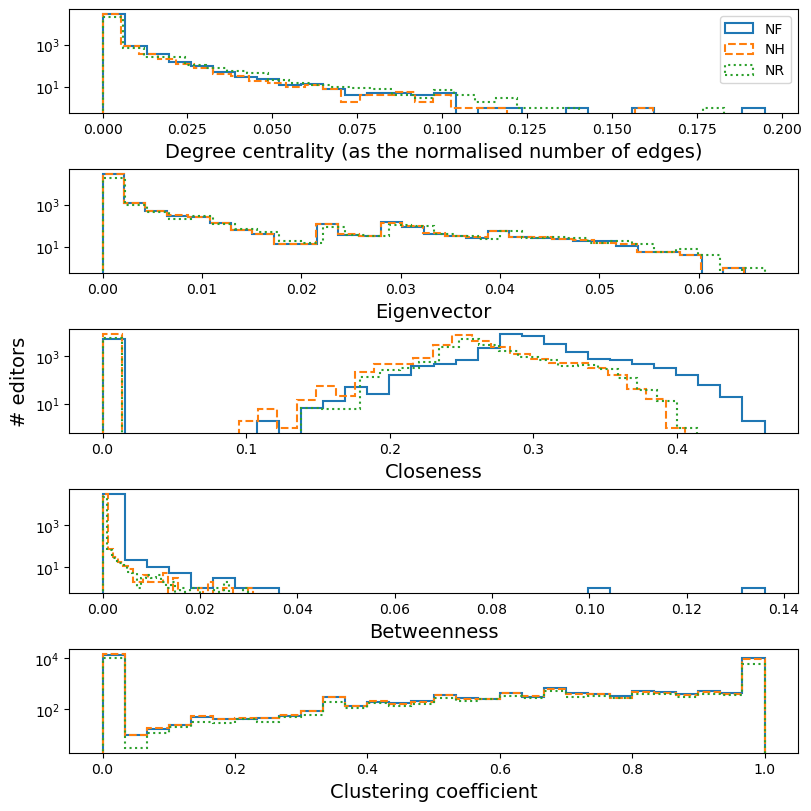

In [62]:
import random
import numpy
from matplotlib import pyplot as plt
import plotly.graph_objects as go


fig, axs = plt.subplots(5,constrained_layout = True)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0].hist(NF['degree_centrality'],bins=30, alpha=1, linewidth=1.5, label='NF',histtype='step')
axs[0].hist(NH['degree_centrality'],bins=30, alpha=1, linewidth=1.5,label='NH',histtype='step',linestyle=('dashed'))
axs[0].hist(NR['degree_centrality'],bins=30, alpha=1, linewidth=1.5,label='NR',histtype='step',linestyle=('dotted'))
axs[0].set_yscale('log')
axs[0].set_xlabel('Degree centrality (as the normalised number of edges)', fontsize=14)
# plt.xscale('log')
axs[0].legend(loc='upper right')

axs[1].hist(NF['eigenvector_centrality'],bins=30, alpha=1, linewidth=1.5, label='NF',histtype='step')
axs[1].hist(NH['eigenvector_centrality'],bins=30, alpha=1, linewidth=1.5,label='NH',histtype='step',linestyle=('dashed'))
axs[1].hist(NR['eigenvector_centrality'],bins=30, alpha=1, linewidth=1.5,label='NR',histtype='step',linestyle=('dotted'))
axs[1].set_yscale('log')
axs[1].set_xlabel('Eigenvector', fontsize=14)

axs[2].hist(NF['closeness_centrality'],bins=30, alpha=1, linewidth=1.5, label='NF',histtype='step')
axs[2].hist(NH['closeness_centrality'],bins=30, alpha=1, linewidth=1.5,label='NH',histtype='step',linestyle=('dashed'))
axs[2].hist(NR['closeness_centrality'],bins=30, alpha=1, linewidth=1.5,label='NR',histtype='step',linestyle=('dotted'))
axs[2].set_yscale('log')
axs[2].set_xlabel('Closeness', fontsize=14)
axs[2].set_ylabel('# editors', fontsize=14)

axs[3].hist(NF['betweenness_centrality'],bins=30, alpha=1, linewidth=1.5, label='NF',histtype='step')
axs[3].hist(NH['betweenness_centrality'],bins=30, alpha=1, linewidth=1.5,label='NH',histtype='step',linestyle=('dashed'))
axs[3].hist(NR['betweenness_centrality'],bins=30, alpha=1, linewidth=1.5,label='NR',histtype='step',linestyle=('dotted'))
axs[3].set_yscale('log')
axs[3].set_xlabel('Betweenness', fontsize=14)

axs[4].hist(NF['clustering_coifficient'],bins=30, alpha=1, linewidth=1.5, label='NF',histtype='step')
axs[4].hist(NH['clustering_coifficient'],bins=30, alpha=1, linewidth=1.5,label='NH',histtype='step',linestyle=('dashed'))
axs[4].hist(NR['clustering_coifficient'],bins=30, alpha=1, linewidth=1.5,label='NR',histtype='step',linestyle=('dotted'))
axs[4].set_yscale('log')
axs[4].set_xlabel('Clustering coefficient', fontsize=14)
plt.savefig('centrality.png',bbox_inches='tight',dpi=300)

### Statistics

In [95]:
a=NF['degree_centrality'].value_counts().sort_index() # 4481 are 0
print('degree full: ',a[0]*100/len(NF))
b=NH['degree_centrality'].value_counts().sort_index() # 4481 are 0
print('degree humans: ',b[0]*100/len(NH))
c=NR['degree_centrality'].value_counts().sort_index() # 4481 are 0
print('degree registered: ',c[0]*100/len(NR))

degree full:  14.364021028336966
degree humans:  24.446586345381526
degree registered:  25.614912480109115


In [101]:
names=NR.loc[NR['degree_centrality']==0,'editors'].to_list()
e_info=pd.read_csv('registered_editors_all_stats_v6_IDs.csv', encoding='utf-8')

s=e_info.loc[e_info['name'].isin(names),'status']
a=s.value_counts().sort_index()
print('active: ', a[1], a[1]*100/len(s))
print('inactive: ', a[0], a[0]*100/len(s))


active:  3007 53.37238196663117
inactive:  2627 46.62761803336883


In [78]:
e_info=pd.read_csv('registered_editors_all_stats_v6_IDs.csv', encoding='utf-8')

names=e_info.loc[e_info['acount_age']>=72,'editors'].to_list()

s=e_info.loc[e_info['name'].isin(names),'status']
a=s.value_counts().sort_index()
print('active: ', a[1], a[1]*100/len(s))
print('inactive: ', a[0], a[0]*100/len(s))

active:  8656 85.46603475513429
inactive:  1472 14.533965244865719


In [82]:
items=pd.read_csv('training_individual_posts.csv')

p_answered=items.loc[items['answer2post']==1]
p_unanswered=items.loc[items['answer2post']==0]


a1=p_answered['status'].value_counts().sort_index()
print('active: ', a1[1], a1[1]*100/len(p_answered))
print('inactive: ', a1[0], a1[0]*100/len(p_answered))


a2=p_unanswered['status'].value_counts().sort_index()
print('active: ', a2[1], a2[1]*100/len(p_unanswered))
print('inactive: ', a2[0], a2[0]*100/len(p_unanswered))

active:  17107 87.10728652171699
inactive:  2532 12.892713478283008
active:  21022 85.80408163265307
inactive:  3478 14.19591836734694


In [84]:
from scipy.stats import chi2_contingency

items=pd.read_csv('training_individual_posts.csv')


data2=items[['status','answer2post']]
# data1.describe()

observations = pd.crosstab(index=data2["status"], columns=data2['answer2post'],margins=False)
chi2, p, dof, ex = chi2_contingency(observations)

print('Statistical test for ',str('answer2post'),' p_value=',str(p),'is there significance', ['Yes' if p<0.05 else 'No'])

Statistical test for  answer2post  p_value= 7.704926971811155e-05 is there significance ['Yes']


In [88]:
from scipy import stats
import scikit_posthocs as sp

e_info=pd.read_csv('registered_editors_all_stats_v6_IDs.csv', encoding='utf-8')
data_g1=e_info.loc[e_info['status']==1,'acount_age']
data_g2=e_info.loc[e_info['status']==0,'acount_age']

from scipy.stats import mannwhitneyu 

  
# perform mann whitney test 
stat, p_value = mannwhitneyu(data_g1, data_g2) 
print('Statistics=%.2f, p=%.2f' % (stat, p_value)) 
# Level of significance 
alpha = 0.05
# conclusion 
if p_value < alpha: 
    print('Reject Null Hypothesis (Significant difference between two samples)') 
else: 
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')


Statistics=88460036.00, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


## RQ2 

### Graphs

### Clustering coefficient for NR

In [4]:
degree=NR['degree_centrality'].value_counts().sort_index()
Pdegree=degree.apply(lambda x: x/len(NR))

In [103]:
test_degree=G3.degree()

degree_sequence = [[n,d] for n, d in G3.degree()]
df_degree=pd.DataFrame({'name':[x[0] for x in degree_sequence], 'degree':[x[1] for x in degree_sequence]})
df_degree['clustering_coefficient']=NR.loc[NR['editors'].isin(df_degree['name']),'clustering_coifficient']


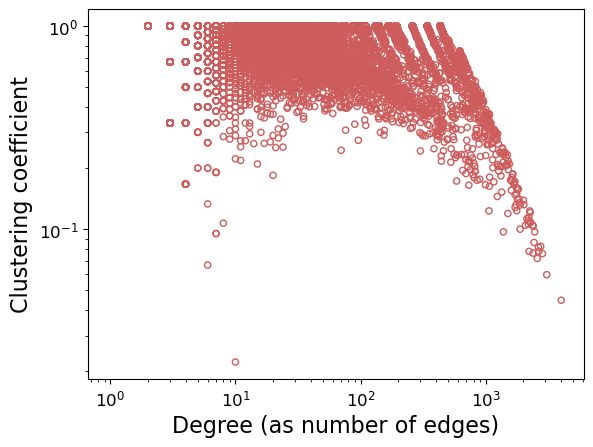

In [106]:
plt.scatter(df_degree['degree'],df_degree['clustering_coefficient'],s=20, facecolors='none', edgecolors='indianred')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Degree (as number of edges)',fontsize=16)
plt.ylabel('Clustering coefficient',fontsize=16)
plt.savefig('clustering.png',bbox_inches='tight',dpi=300)

### Connected Components for NR

In [8]:
# list down all the connected components
all=list(nx.connected_components(G3))

In [9]:
# a sorted list of cc
from collections import Counter
b=[len(c) for c in sorted(nx.connected_components(G3), key=len, reverse=True)]
x=Counter(b).keys()
y=Counter(b).values()


In [10]:
#larstest connected component
largest_cc = max(nx.connected_components(G3), key=len)

print('size of largest cc" ', len(largest_cc)*100/G3.number_of_nodes())
print('size of second largest cc" ', b[1]*100/G3.number_of_nodes())



size of largest cc"  73.51216185496703
size of second largest cc"  0.03637190270516026


In [11]:
#To create the induced subgraph of each component use
S = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
LG=S[0] # giant component

In [13]:
import numpy as np
LG=S[0]
print('number of nodes only registered: ', LG.number_of_nodes())
print('number of edges only registered: ',LG.number_of_edges())
# num_nodes = len(LG.nodes())
# avg_degree = np.mean([d for n, d in LG.degree()])
# print('average clustering coefficitne: ', nx.average_clustering(LG))
# print('average shortest path: ', nx.average_shortest_path_length(LG))

number of nodes only registered:  16169
number of edges only registered:  470126


### Shortest paths

In [31]:
diameter=nx.diameter(LG)
diameter

7

Random sampling of nodes to explore shortest paths similar to the MSN study

In [ ]:
# radom selection of nodes
import random
random_nodes = random.sample(list(LG.nodes), 1000)
LG_sample = LG.subgraph(random_nodes)
#find shortest paths
shortest_paths=[]
num=0
for node in list(LG_sample.nodes()):
    num += 1
    shortest_paths_dict= nx.shortest_path(LG_sample,source=node)
    for i in shortest_paths_dict.items():
        print(num,i[1])
        shortest_paths.append(len(i[1])-1)

In [ ]:
from collections import Counter
paths=Counter(shortest_paths)

p=[x[0] for x in paths.items()]
num=[x[1] for x in paths.items()]
num_percentage=[x/sum(num) for x in num]
pp=[x/len(p) for x in p]

In [64]:
import numpy as np

np.percentile(shortest_paths,90)

4.0

/var/folders/d0/7kv6p3jd6g31dhg2nklts4tc0000gp/T/ipykernel_2334/2415504456.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(p, num, '--bo', color='indianred')


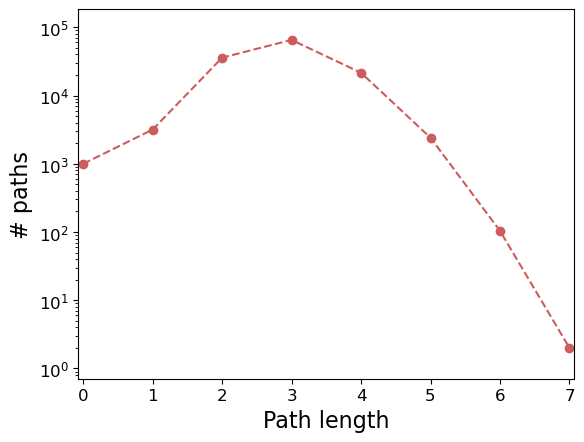

In [114]:
plt.plot(p, num, '--bo', color='indianred')
plt.yscale('log')
plt.margins(x=0.01, y=0.1)
plt.ylabel('# paths', fontsize=16)
plt.xlabel('Path length', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('paths.png',bbox_inches='tight',dpi=300)

### Assortativity

In [14]:
# Calculate degree assortativity coefficient
assortativity = nx.degree_assortativity_coefficient(LG)

# Print the assortativity value
print(assortativity)

-0.23375507051440084


### Small world network comparisons

Small world network

In [ ]:
SWG = nx.watts_strogatz_graph(num_nodes, k=int(avg_degree), p=0.5)
print('average clustering coefficitne: ', nx.average_clustering(SWG))
print('average shortest path: ', nx.average_shortest_path_length(SWG))


In [13]:
import networkx as nx
SWG = nx.watts_strogatz_graph(16169, k=int(54), p=0.5)
print('number of nodes: ', SWG.number_of_nodes())
print('number of edges : ',SWG.number_of_edges())

number of nodes:  16169
number of edges :  436563


Random network

- 1

In [ ]:
# from networkx.generators.random_graphs import erdos_renyi_graph
import networkx as nx
n = 16169
p = 0.004
g = nx.erdos_renyi_graph(n=16169, p=0.004)


In [7]:
b_test=[len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]


In [8]:
print('number of nodes: ', g.number_of_nodes())
print('number of edges : ',g.number_of_edges())
print('average clustering coefficitne: ', nx.average_clustering(g))
print('average shortest path: ', nx.average_shortest_path_length(g))

number of nodes:  16169
number of edges :  523907
average clustering coefficitne:  0.0040175616542121985
average shortest path:  2.764196826695907


- 2

In [14]:
g1 = nx.gnm_random_graph(16169, 470126)

In [15]:
b_test=[len(c) for c in sorted(nx.connected_components(g1), key=len, reverse=True)]


In [16]:
print('number of nodes: ', g1.number_of_nodes())
print('number of edges : ',g1.number_of_edges())
print('average clustering coefficitne: ', nx.average_clustering(g1))
print('average shortest path: ', nx.average_shortest_path_length(g1))

number of nodes:  16169
number of edges :  470126
average clustering coefficitne:  0.0036082103567739647
average shortest path:  2.8047815259951108
